Heart Disease Prediction Using Logistic Regression

In [3]:
#Import pandas, matplotlib.pyplot and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Imported Successfully")

Imported Successfully


In [4]:

#Load Heart Disease dataset from UCI Machine Learning Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age','sex','cp','trstbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data = pd.read_csv(url, names=columns)

In [5]:
data.head()

,age,sex,cp,trstbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Exploring Data

In [6]:
# Inspect colums and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   trstbps  303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  num      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


In [7]:
# View basic statistics
print(data.describe())

              age         sex          cp     trstbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

In [8]:
# Check for missing values 
print(data.isnull().sum())     #missing values summary)

age        0
sex        0
cp         0
trstbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
num        0
dtype: int64



Visualize feature distributions

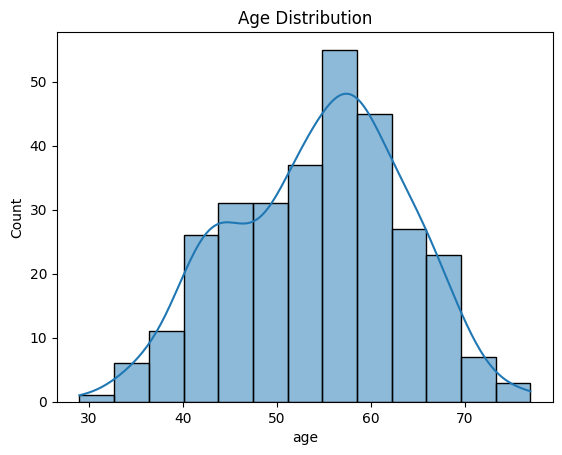

In [9]:
# Histplot for Age Distribution
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

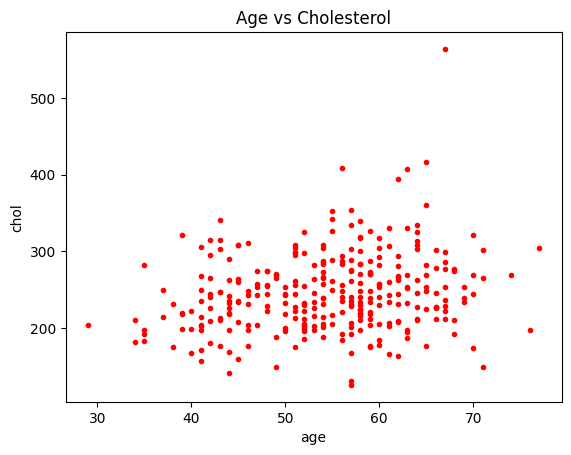

In [10]:
#Scatter plot to show the rlship between 'age' and 'cholesterol level'
plt.scatter(data['age'], data['chol'], color='red', marker='.')
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Age vs Cholesterol')
plt.show()

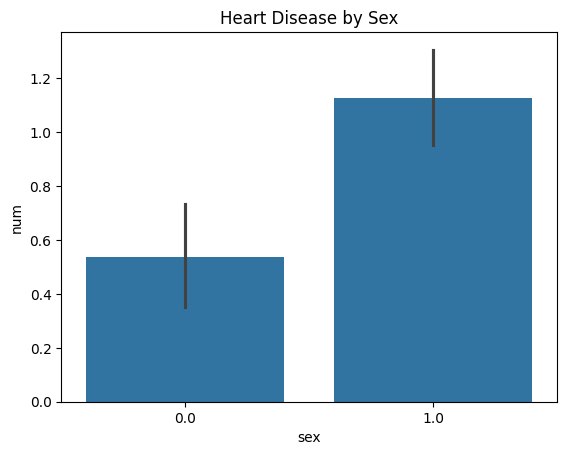

In [11]:
# Heart disease rate by sex
sns.barplot(x='sex', y='num', data=data)
plt.title('Heart Disease by Sex')
plt.show()

Dataset Preparation And Modelling

In [12]:
#Import scikit.learn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [13]:
#Handling missing values
#replace '?' with NaN
data.replace('?', np.nan, inplace=True)

In [14]:
#convert columns with missing values to numerical
df= data.apply(pd.to_numeric, errors='coerce')

In [15]:
#Handle missing values
df.dropna(inplace=True)

In [16]:
# Separate features (x) and target (y)
x = df.drop('num', axis=1)
y = (df['num'] > 0).astype(int)       # (0: No Heart Disease, 1:Heart Disease)

In [17]:
# Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
#Train Logistic Regression Model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

Predict And Evaluate Model

In [19]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.87


Model Interpretation

In [20]:
# Access feature names
feature_names = x.columns
feature_names

Index(['age', 'sex', 'cp', 'trstbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [21]:
# Extract coefficient and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print(f'Slope:', coefficients)
print(f'Intercept:', intercept)

Slope: [-0.03734085  0.94724687  0.24333719  0.01936954  0.00430643 -0.81011846
  0.22411656 -0.03600081  0.74124468  0.33169244  0.10139301  1.16448869
  0.29300813]
Intercept: -0.6408236124150263


In [22]:
# Combine feature names and coefficient to draw insights
for feature, coef in zip(feature_names, coefficients):
    print(f'Feature:{feature},coefficient:{coef:.4f}')
    

Feature:age,coefficient:-0.0373
Feature:sex,coefficient:0.9472
Feature:cp,coefficient:0.2433
Feature:trstbps,coefficient:0.0194
Feature:chol,coefficient:0.0043
Feature:fbs,coefficient:-0.8101
Feature:restecg,coefficient:0.2241
Feature:thalach,coefficient:-0.0360
Feature:exang,coefficient:0.7412
Feature:oldpeak,coefficient:0.3317
Feature:slope,coefficient:0.1014
Feature:ca,coefficient:1.1645
Feature:thal,coefficient:0.2930


High coefficient shows strong relationship between features and heart disease, conversely, low coefficient value indicate a weak correlation 

Confusion Matric

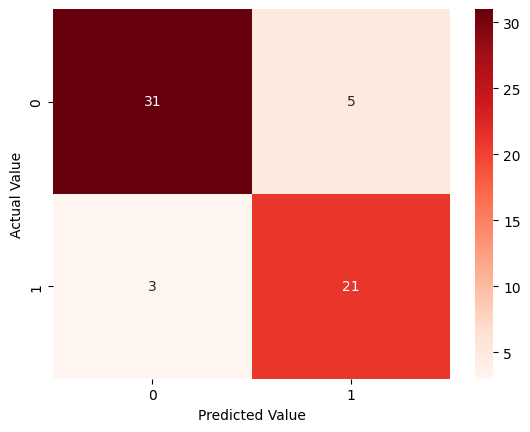

In [23]:
#Comparing predicted value with actual value
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Reds')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Saving the Model

In [24]:
import joblib
joblib.dump(model,'Heart_Disease_Predictor.joblib')

['Heart_Disease_Predictor.joblib']